In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data-test-analytics.csv')
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [3]:
df['deleted_at'] = df['deleted_at'].fillna('01/01/24 00:00 AM')

In [4]:
# converte as colunas 'created_at' e 'deleted_at' para o formato datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['deleted_at'] = pd.to_datetime(df['deleted_at'])
df['client_time'] = (df['deleted_at'] - df['created_at']).dt.days

df["month_year_cancel"] = df["deleted_at"].dt.strftime("%Y-%m")
df["month_year_sign"] = df["created_at"].dt.strftime("%Y-%m")

In [5]:
churn_table = {} 
churn_table = pd.DataFrame(churn_table)
churn_table['month-year'] = df['created_at'].copy()
churn_table['month-year'] = churn_table['month-year'].dt.strftime("%Y-%m")


churn_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month-year  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [6]:
churn_table = pd.DataFrame(churn_table['month-year'].sort_values().unique(), columns=['month-year'])
churn_table.head()

,month-year
0,2016-02
1,2016-03
2,2016-04
3,2016-05
4,2016-06


In [7]:
churn_table['month-year'] = pd.to_datetime(churn_table['month-year']) #+ pd.offsets.MonthEnd(1)

In [8]:
nasc = df.birth_date.str.split(' ', expand=True).get(0)


# definir uma função personalizada para formatar a data
def format_date(date_str):
    year = int(date_str.split('/')[-1])
    if year < 100:
        year += 1900
    return '{}/{}/{}'.format(date_str[:2], date_str[3:5], year)

# aplicar a função na coluna 'birth_date' para formatar a data corretamente
df['birth_date'] = nasc.apply(format_date)
datas = ['created_at', 'updated_at', 'birth_date', 'deleted_at', 'last_date_purchase']

for v, k in enumerate(datas):
    df[k] = pd.to_datetime(df[k])
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,...,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,client_time,month_year_cancel,month_year_sign
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,2024-01-01,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10,active,2.31.7,...,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm,2329,2024-01,2017-08
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:00,2021-01-08 11:23:00,2024-01-01,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06,paused,3.30.12,...,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search,1461,2024-01,2019-12
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:00,2021-01-07 11:23:00,2024-01-01,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18,active,3.28.9,...,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search,1760,2024-01,2019-03
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:00,2021-01-10 11:23:00,2024-01-01,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21,active,3.34.3,...,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search,1989,2024-01,2018-07
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:00,2021-01-18 11:23:00,2024-01-01,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07,active,3.19.8,...,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm,2032,2024-01,2018-06


In [9]:
churn_table

,month-year
0,2016-02-01
1,2016-03-01
2,2016-04-01
3,2016-05-01
4,2016-06-01
...,...
56,2020-10-01
57,2020-11-01
58,2020-12-01
59,2021-01-01


In [10]:
teste = df.copy()

In [11]:
from time import time
start = time()

churn_table['ativos'] = 0
churn_table['cancelados'] = 0

for i, j in enumerate(churn_table['month-year']):
    for k, v in enumerate(teste['id']):
        end_date = pd.to_datetime('2021-03-01')
        
        # Calculo dos ativos naquele mês
        if i < 60:
            if teste.loc[k,'created_at'] < churn_table.loc[i+1, 'month-year'] and teste.loc[k,'deleted_at'] > churn_table.loc[i+1, 'month-year']:
                churn_table.loc[i,'ativos'] += 1
        else:
            if teste.loc[k,'created_at'] < end_date and teste.loc[k,'deleted_at'] > end_date:
                churn_table.loc[i,'ativos'] += 1
                
        #Calculo dos cancelados naquele
        if i < 60:
            if teste.loc[k,'deleted_at'] > churn_table.loc[i, 'month-year'] and teste.loc[k,'deleted_at'] < churn_table.loc[i+1, 'month-year']:
                churn_table.loc[i,'cancelados'] += 1
        else:
            if teste.loc[k,'deleted_at'] >= churn_table.loc[i, 'month-year'] and teste.loc[k,'deleted_at'] < end_date:
                churn_table.loc[i,'cancelados'] += 1
end = time()
print(f'{end-start:.2f} segundos')
churn_table

258.91 segundos


,month-year,ativos,cancelados
0,2016-02-01,70,0
1,2016-03-01,242,0
2,2016-04-01,391,0
3,2016-05-01,571,1
4,2016-06-01,769,1
...,...,...,...
56,2020-10-01,9065,20
57,2020-11-01,9175,32
58,2020-12-01,9301,37
59,2021-01-01,9413,33


In [12]:
churn_table.sum()

ativos        303635
cancelados       505
dtype: int64

In [13]:
churn_table['base_inicio'] = churn_table['ativos'].shift(1).fillna(0)
churn_table

,month-year,ativos,cancelados,base_inicio
0,2016-02-01,70,0,0.0
1,2016-03-01,242,0,70.0
2,2016-04-01,391,0,242.0
3,2016-05-01,571,1,391.0
4,2016-06-01,769,1,571.0
...,...,...,...,...
56,2020-10-01,9065,20,8928.0
57,2020-11-01,9175,32,9065.0
58,2020-12-01,9301,37,9175.0
59,2021-01-01,9413,33,9301.0


In [14]:
churn_table['churn %'] = (churn_table['cancelados']/churn_table['base_inicio'])*100
churn_table.head()

,month-year,ativos,cancelados,base_inicio,churn %
0,2016-02-01,70,0,0.0,NaN
1,2016-03-01,242,0,70.0,0.000000
2,2016-04-01,391,0,242.0,0.000000
3,2016-05-01,571,1,391.0,0.255754
4,2016-06-01,769,1,571.0,0.175131


In [16]:
churn = churn_table.copy()
churn.drop(['ativos'], axis=1, inplace=True)
churn['month-year'] = churn_table['month-year'].dt.strftime("%Y-%m")

churn.head()

,month-year,cancelados,base_inicio,churn %
0,2016-02,0,0.0,NaN
1,2016-03,0,70.0,0.000000
2,2016-04,0,242.0,0.000000
3,2016-05,1,391.0,0.255754
4,2016-06,1,571.0,0.175131


''

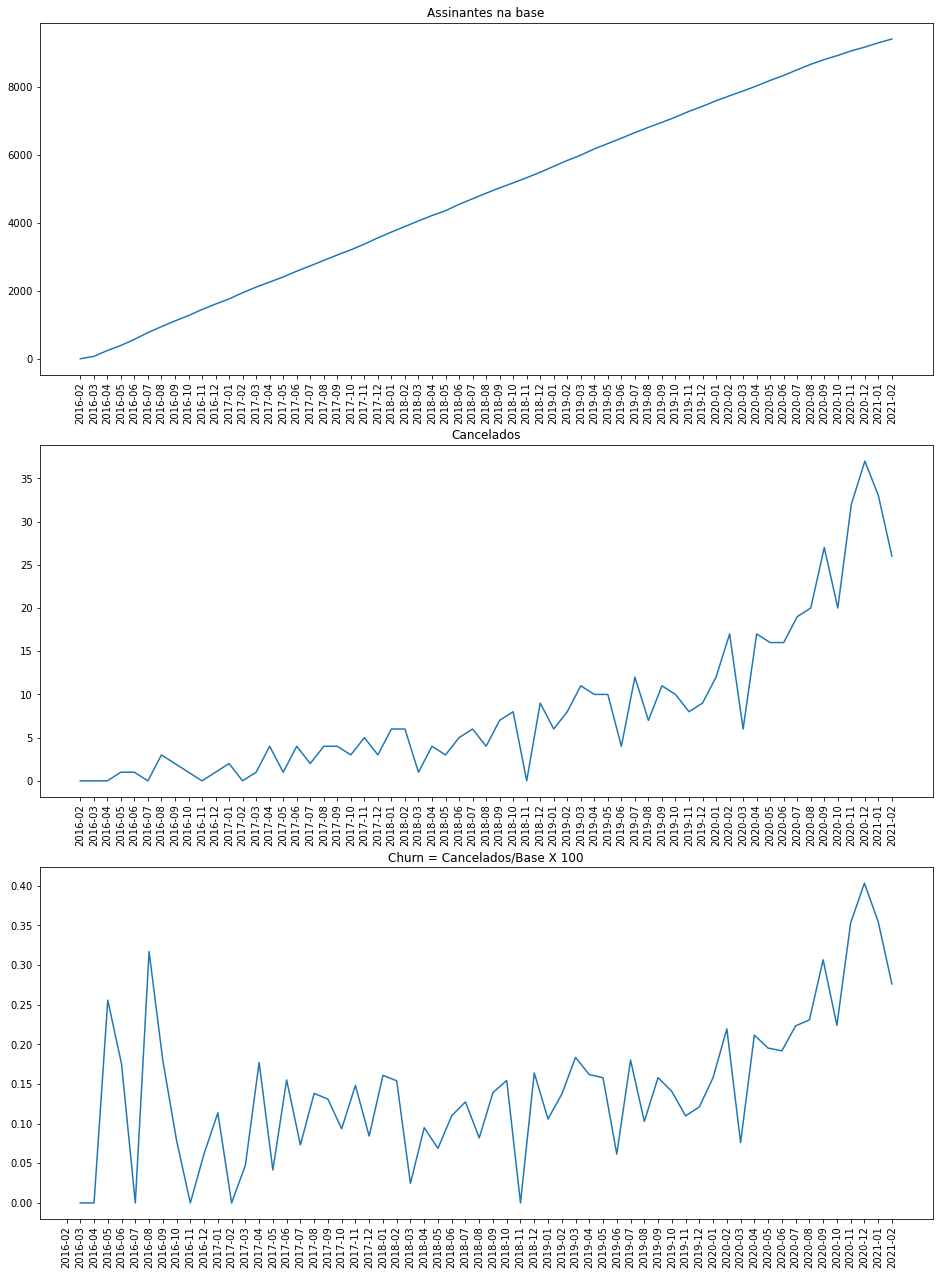

In [38]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16,22))

ax[0].plot(churn['month-year'], churn.base_inicio)
ax[0].set_title('Assinantes na base')
#ax[0].set_xlim(churn_table.iloc[45, 0], churn_table.iloc[-1, 0])

ax[1].plot(churn['month-year'], churn.cancelados)
ax[1].set_title('Cancelados')
#ax[1].set_xlim(churn_table.iloc[45, 0], churn_table.iloc[-1, 0])

ax[2].plot(churn['month-year'], churn['churn %'])
ax[2].set_title('Churn = Cancelados/Base X 100')
#plt.xlim(churn_table.iloc[45, 0], churn_table.iloc[-1, 0])

for i in range(3):
    ax[i].tick_params(axis='x', labelrotation = 90)
;

In [40]:
churn.to_csv('churn_table.csv')